# Unsupervised Learning Team JS4
We will use this Notebook to build and test various models relating to our goal.

## Our Team:
- Kwanda Silekwa
- Thembinkosi Malefo
- Sihle Riti
- Nomfundo Manyisa
- Ofentse Sabe
- Thanyi

## Introduction
The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play. Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.

### What is recommendation system?
Recommender System is a system that seeks to predict or filter preferences according to the user’s choices. Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general. Moreover, companies like Netflix and Spotify depend highly on the effectiveness of their recommendation engines for their business and sucees.

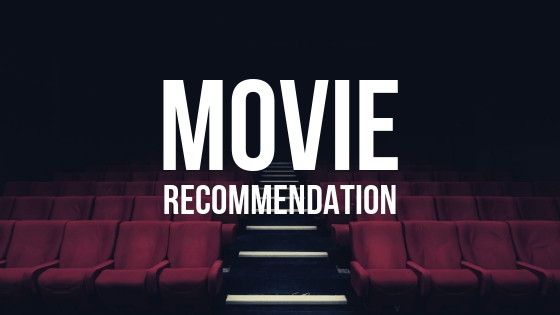


### Different types of recommendation system

- Content-based
This recommendation is based on a similar feature of different entities. If someone likes the movie Iron man then it recommends The avengers because both are from marvel, similar genres, similar actors. Recommender systems can extract similar features from a different entity for example, in movie recommendation can be based on featured actor, genres, music, director.

- Collaborative filtering:
Collaborative filtering recommends the user based on the preference of other users. There are two different methods of collaborative filtering.


- Model-based:
A model-based collaborative filtering recommendation system uses a model to predict that the user will like the recommendation or not using previous data as a dataset.

- Memory-based:
In memory-based collaborative filtering recommendation based on its previous data of preference of users and recommend that to other users.


But,the current recommendation systems that are bring used and are popular are the content-based filtering and collaborative filtering which works by implementing different information sources to make the recommendations, which is what will be focusing on in this predict

- Content-based filtering (CBF) : makes recommendations based on user preferences for product features.
- Collaborative filtering (CF): mimics user-to-user recommendations (i.e. it relies on how other users have responded to the same items). 

It predicts users preferences as a linear, weighted combination of other user preferences.
We have to note that both of these methods have limitations: The CBF can recommend a new item but needs more data on user preferences to give out the best match. On the other hand, the CF requires large dataset with active users who rated the product before to make the most accurate predictions. The combination of both of these methods is known as hybrid recommendation systems.

## Problem statement:
Construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences

## Importing Libraries

In [ ]:
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer as countVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp

# importing the libraries

import math
import random
import json
import re
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from plotly.offline import iplot
import plotly.graph_objs as go

# Packages for modeling
from surprise import NormalPredictor
from surprise import Reader
from surprise import Dataset
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline
from surprise import BaselineOnly, SlopeOne, CoClustering
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

# Kaggle requirements
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))   
        


## Loading the dataset
We going to load the dataframe will be working with

In [ ]:
#Loading data
df_train = pd.read_csv('../input/edsa-movie-recommendation-challenge/train.csv')
df_test = pd.read_csv('../input/edsa-movie-recommendation-challenge/test.csv')
df_movies = pd.read_csv('../input/edsa-movie-recommendation-challenge/movies.csv')
df_sample_submission = pd.read_csv('../input/edsa-movie-recommendation-challenge/sample_submission.csv')
df_imdb = pd.read_csv('../input/edsa-movie-recommendation-challenge/imdb_data.csv') 
df_genome_tags = pd.read_csv("../input/edsa-movie-recommendation-challenge/genome_tags.csv")
df_genome_scores = pd.read_csv("../input/edsa-movie-recommendation-challenge/genome_scores.csv")
df_tags = pd.read_csv("../input/edsa-movie-recommendation-challenge/tags.csv")
df_links = pd.read_csv("../input/edsa-movie-recommendation-challenge/links.csv")

## Evaluating the data

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

### Source
The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB

### Supplied files
- genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- sample_submission.csv - Sample of the submission format for the hackathon.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

In [ ]:
# Showing the number of rows and columns for each table
print("Train data contains {} rows and {} columns".format(df_train.shape[0], df_train.shape[1]))
print("Movie data contains {} rows and {} columns".format(df_movies.shape[0], df_movies.shape[1]))
print("Imdb data contains {} rows and {} columns".format(df_imdb.shape[0], df_imdb.shape[1]))
print("Genome_tags data contains {} rows and {} columns".format(df_genome_tags.shape[0], df_genome_tags.shape[1]))
print("Genome_scores data contains {} rows and {} columns".format(df_genome_scores.shape[0], df_genome_scores.shape[1]))
print("Tags data contains {} rows and {} columns".format(df_tags.shape[0], df_tags.shape[1]))
print("Links data contains {} rows and {} columns".format(df_links.shape[0], df_links.shape[1]))

In [ ]:
#viewing training data
df_train.head()

Train:

- UserId
- movieId : Identifier for movies used
- rating : Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars)
- timestamp: represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

In [ ]:
#viewing tags data
df_tags.head()

Tags:

- userId
- movieId : Identifier for movies used
- tag : User-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.
- timestamp : represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

In [ ]:
#viewing movies data
df_movies.head()

Movies:

- movieId : Identify the movies that are watched 

- title : Entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

- genres: They are pipe-separated list, and are selected from the following:
    - Action
    - Adventure
    - Animation
    - Children's
    - Comedy
    - Crime
    - Documentary
    - Drama
    - Fantasy
    - Film-Noir
    - Horror
    - Musical
    - Mystery
    - Romance
    - Sci-Fi
    - Thriller
    - War
    - Western
    - (no genres listed)

In [ ]:
#viewing links data
df_links.head()

Links:

- movieId : Identifier for movies used by https://movielens.org
- imdbId : Identifier for movies used by http://www.imdb.com
- tmdbId : An identifier for movies used by https://www.themoviedb.org.

In [ ]:
#viewing genome scores data
df_genome_scores.head()

In [ ]:
#viewing genome tags data
df_genome_tags.head()

Genome_tags:

- tagId
- tag : tag descriptions for the tag IDs in the genome file

In [ ]:
#viewing Imdb_data
df_imdb.head()

In [ ]:
df_imdb.describe(include = 'all')

## Data Preparation

### Removing the pipe between genres, title_cast and plot_keywords

In [ ]:
def to_list(df, column) :
    df[column] = df[column].str.split('|')
    return df[column]

In [ ]:
def get_genre_list(df,column) :
    genres_list = []
    for genre in df[column].unique():
        genres_list = genres_list + genre.split("|")
        genres_list = list(set(genres_list))
    return genres_list

In [ ]:
# Make a census of the genre keywords
def get_genre_labels(df,column) :
    genre_labels = set()
    for s in df_movies['genres'].str.split('|').values:
        genre_labels = genre_labels.union(set(s))
    return genre_labels

In [ ]:
# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
   
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
                
    keyword_occurences = []
    for w,y in keyword_count.items():
        keyword_occurences.append([w,y])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [ ]:
def to_str(df, column) : 
    df[column] = [','.join(map(str, l)) for l in df[column]]
    return df[column]

In [ ]:
genre_labels = get_genre_list(df_movies, 'genres')
print(genre_labels)

In [ ]:
keyword_occurences, dum = count_word(df_movies, 'genres', genre_labels)
print(keyword_occurences[:5])

In [ ]:
genres_list = get_genre_list(df_movies, 'genres')
print(genres_list)

In [ ]:
df_movies.genres = to_list(df_movies, 'genres')

In [ ]:
df_movies.genres = to_str(df_movies, 'genres')
df_movies.head()

In [ ]:
df_imdb.plot_keywords = to_list(df_imdb, 'plot_keywords')

In [ ]:
df_imdb.title_cast = to_list(df_imdb, 'title_cast')
df_imdb.head()

### Merging of the dataset

#### Merging of the df_train, df_movies and df_imdb dataframes into df_full_movies

In [ ]:
# Merge the train and movies data
table1 = pd.merge(df_train, df_movies, on = ['movieId'])
# df_table1 = df_train.merge(df_movies, on='movieId')

# Viewing the 1st 5 rows
table1.head()

In [ ]:
# Checking for nulls
table1.isnull().sum()

In [ ]:
# Merging table1 dataframe and Imdb data
df_full_movies = pd.merge(table1, df_imdb, on='movieId')

# Viewing the 1st 5 rows
df_full_movies.head()

In [ ]:
# Checking for nulls
df_full_movies.isnull().sum()

In [ ]:
df_full_movies.shape

In [ ]:
df_full_movies.dtypes

#### Merging of the df_genome_scores and df_genome_tags into df_tags_scores

In [ ]:
df_tags_scores = pd.merge(df_genome_tags , df_genome_scores , on = ['tagId'])
df_tags_scores.head()

In [ ]:
# Capturing Tags only if its relevance is higher than 80% to a movie
df_tags_scores_2 = df_tags_scores[df_tags_scores['relevance'] > 0.80]
df_tags_scores_2.head()

## Exploratory data analysis

In [ ]:
# Symbols of the colours used throughout the notebook
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'g']

### 1. Ratings

####  i) Checking the number of movin ratings

In [ ]:
# Creating a plot for the movie ratings
data = df_full_movies['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x=data.index,
               y=data.values,
               marker=dict(color='#0080ff'))
layout = dict(title='Distribution of Movie ratings'.format(df_full_movies.shape[0]),
              xaxis=dict(title='rating'),
              yaxis=dict(title='Count'))
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


- We can observe that most of the movies we rated above 3 which exceeded the average of ratings and least of the movie rating was below 3

#### ii) Here is a distribution of number of ratings given by each user. Histogram is truncated for users that rated less than 200 movies. 

In [ ]:
user_ratings = df_full_movies.groupby(by='userId')
d = user_ratings['rating'].count()
limit = 200
plt.figure(figsize=(10,10))
plt.hist(d[d<=limit], bins='fd')
plt.xlabel('number of rated movies')
plt.ylabel('number of users')
print(f'Only users with less than {limit} ratings are displayed ({len(user_ratings) - len(d[d<=limit]):,} users omitted).')
plt.show()

- We can observe that the movies that are rated by people are highest between 0 to 25. From this we can see that movies that high rating, tend to have high number os views

In [ ]:
# Displaying the rating of a movie by a user
users_average = df_full_movies.groupby('userId')['rating'].mean()
items_average = df_full_movies.groupby('movieId')['rating'].mean()
plt.figure(figsize=(10,8)) 
plt.hist([users_average, items_average], histtype='step', density=True, ) 
plt.xlabel('average rating for a movie / by a user')
plt.ylabel('number of movies / users')
plt.legend(['average rating given by a user', 'average rating of a movie'], loc=2)
plt.show()

- We can observe from the graph that when the average rating of movies is lower, the average rating of the user is higher 

### 2. Movies

This is a list of the most rated (among movies with at least 20 ratings):

In [ ]:
movie_ratings = df_full_movies.groupby(by='movieId')
most_rated = movie_ratings['rating'].count().sort_values(ascending=False).head(10)
print(pd.merge(pd.DataFrame(most_rated), df_movies, on='movieId')[['title','rating']].rename(index=lambda x: x+1, columns={'rating': 'n. of ratings'}),'\n')

This is a list of the top rated movies (among movies with at least 20 ratings):

In [ ]:
movie_ratings = df_full_movies.groupby(by='movieId')
top_rated = movie_ratings['rating'].mean().where(movie_ratings['rating'].count() > 20).sort_values(ascending=False).head(10)
print(pd.merge(pd.DataFrame(top_rated), df_movies, on='movieId')[['title','rating']].rename(index=lambda x: x+1, columns={'rating': 'average rating'}))

In [ ]:
# Create a wordcloud of the movie titles
df_movies['title'] = df_movies['title'].fillna("").astype('str')
title_corpus = ' '.join(df_movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

- We can observe from that Girl, Love and Man are the most popular title words
- We also observed that Warrior, Affair and Without are the least popular title words

In [ ]:
# Creating a dataframe for the number of movies
num_ratings = pd.DataFrame(df_full_movies.groupby('movieId').count()['rating']).reset_index()
df_full_movies = pd.merge(left=df_full_movies, right=num_ratings, on='movieId')
df_full_movies.rename(columns={'rating_x': 'rating', 'rating_y': 'NumberRatings'}, inplace=True)
df_full_movies.head()

In [ ]:
# Dropping the duplicates in the movies
Remove_duplicates = df_full_movies.drop_duplicates('movieId')
Remove_duplicates.head()

In [ ]:
# Getting the number of ratings per director
Director_ratings = pd.DataFrame(Remove_duplicates.groupby('director').sum()['NumberRatings'].sort_values(ascending=False)).reset_index()

# visualize the number of movies per director
plt.figure(figsize = (14, 9.5))
sns.barplot(data = Director_ratings.head(50), y = 'director', x = 'NumberRatings', color = 'Blue')
plt.ylabel('Directors')
plt.xlabel('Number of ratings')
plt.title('Number of ratings per director\n')
#plt.xlim(0, 27)
plt.show()

In [ ]:
# Number of movies per director
director_movies = pd.DataFrame(Remove_duplicates.groupby('director').count()['title'].sort_values(ascending=False)).reset_index()
director_movies.head()

In [ ]:
# Number of movies per director
director_movies = pd.DataFrame(Remove_duplicates.groupby('director').count()['title'].sort_values(ascending=False)).reset_index()


# visualize the number of movies per director
plt.figure(figsize = (14, 9.5))
sns.barplot(data = director_movies.head(50), y = 'director', x = 'title', color = 'Blue')
plt.ylabel('Directors')
plt.xlabel('Number of movies released')
plt.title('Number of Movies released per director\n')
plt.xlim(0, 27)
plt.show()

### 3. Genres

In [ ]:
df_full_movies.head()

In [ ]:
print(genres_list)

In [ ]:
print(genre_labels)

In [ ]:
print(keyword_occurences)

In [ ]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# plot the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='black')
genre_wordcloud.generate_from_frequencies(genres)
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Some preprocessing will done on the budget column

# Removing commas
df_full_movies['budget'] = df_full_movies['budget'].str.replace(',', '')

# Remove currency signs
df_full_movies['budget'] = df_full_movies['budget'].str.extract('(\d+)', expand=False)

# Replace Nan with 0 on budget
df_full_movies['budget'] = df_full_movies['budget'].replace(np.nan, 0)

In [ ]:
# Removing the years from title
df_full_movies['release_year'] = df_full_movies.title.str.extract('(\(\d\d\d\d\))', expand=False)

In [ ]:
#Removing brackets
df_full_movies['release_year'] = df_full_movies['release_year'].str.replace('[(,)]', '', regex=True)

In [ ]:
# Changing the timestamp into years
import time
df_full_movies['timestamp'] = df_full_movies['timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))
df_full_movies.head()

In [ ]:
avg_ratings = df_full_movies.groupby(['movieId', 'title', 'genres', 'release_year'], as_index=False)['rating'].mean()
avg_ratings.head()

In [ ]:
genres = avg_ratings['genres'].apply(lambda x: x[0:].split(','))
genres.head()

In [ ]:
# create a new split_data dataframe
split_data = pd.DataFrame({'genres':genres.values}, index = avg_ratings['genres'].index)

split_data['rating'] = avg_ratings['rating']
split_data['title'] = avg_ratings['title']
split_data['year'] = avg_ratings['release_year']
split_data['movieId'] = avg_ratings['movieId']

split_data.head()

In [ ]:
objs = [split_data, pd.DataFrame(split_data['genres'].tolist())]
new_df = pd.concat(objs, axis=1).drop('genres', axis=1).sort_values('rating', ascending=False)
final_ratings = pd.melt(new_df, var_name='genre', value_name="genres", id_vars=['movieId','rating','title', 'year'], value_vars=[0,1,2,3,4,5,6,7,8]).sort_values('rating', ascending=False)
final_ratings = final_ratings[final_ratings.genres.notnull()].drop("genre", axis=1)
final_ratings.sort_values(by=['movieId'], inplace=True)
final_ratings.head()

In [ ]:
# Total number of movies with a specific genre counted multiple times for multi genre movies
genre_count = final_ratings.groupby('genres').count()[['movieId']]
genre_count = genre_count.rename(columns = {'movieId': 'count'})
genre_count = genre_count.sort_values('count', ascending=False)

count = genre_count['count'].tolist()
genre = genre_count.index.tolist()
genre_count = pd.DataFrame({'genre': genre, 'count': count})
genre_count

In [ ]:
# Ploting the most commonly watched and least watch genre
genre_count.plot.barh(x = 'genre', y = 'count', color = 'blue',figsize = (15,10))
plt.xlabel('Number of movies')
plt.ylabel('Genre')
plt.title('Number of Movies vs Genre')

plt.show()

In [ ]:
# Getting the rating of genres 
avg_genre_ratings = final_ratings.groupby(['genres'], as_index=False)['rating'].mean()
avg_genre_ratings = avg_genre_ratings.sort_values(by=['rating'], ascending=False)
avg_genre_ratings

- From the table above, we can see clearly that documentary genre is mostly rated and Horror is least rated which shows that people like viewing more of documentaries and really what to know what's happening in the world and Horror genres is least rated which we can assume people are scared of watching movies that will scare them 

In [ ]:
# Ploting of the genres ratings
avg_genre_ratings.plot.barh(x = 'genres', y='rating', color = 'blue',figsize = (15,10) )
plt.xlabel('Rating')
plt.ylabel('Genres')
plt.title('Comparing Movie Ratings by Genre')

plt.show()

- The bargrah simply displays the information we spoke above about the genres rating

In [ ]:
# Sorting the table by year
final_ratings.sort_values(by=['year'], ascending=True)
final_ratings

In [ ]:
# Checking how the genres are rated from 1995 to 2019
rating_acrossYears = final_ratings.groupby(['genres', 'year'], as_index=False)['rating'].mean()

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 12))
for genre, year in rating_acrossYears.groupby('genres'):
    year.plot(x='year', y='rating', ax=ax, label=genre)
    
plt.xlabel('Year (1995 - 2019)')
plt.xlim(71, 94) 
plt.ylabel('Rating')
plt.title('Trends in Average Movie Ratings for Different Genres')
plt.show()

### 4. Correlation of Features

In [ ]:
# Plotting using the features
def plot_correlation_map( df ):
    corr = df.corr()
    Ay,ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 250 , 11 , as_cmap = True )
    Ay = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })
    
    
    plot_correlation_map(df_full_movies[['userId','movieId','rating', 'timestamp', 'budget','runtime']])

- We can observe that there is a negative weak relationship ratings and movieId, and movieId and userId, ratings and userId while the others relationship are also weak but postive among each each other

## Content-based and Collaborative Filtering

### Content-Based Filtering

In [ ]:
df_full_movies.head()

In [ ]:
Extracted_columns = df_full_movies[['movieId','title_cast','director', 'plot_keywords', 'genres', 'title']]
Extracted_columns.head()

In [ ]:
# Convert data types to strings for string handling
Extracted_columns['title_cast'] = Extracted_columns.title_cast.astype(str)
Extracted_columns['plot_keywords'] = Extracted_columns.plot_keywords.astype(str)
Extracted_columns['genres'] = Extracted_columns.genres.astype(str)
Extracted_columns['director'] = Extracted_columns.director.astype(str)

In [ ]:
# Discarding the pipes between the plot keywords' and getting only the first five words
Extracted_columns['plot_keywords'] = Extracted_columns['plot_keywords'].map(lambda x: x.split('|'))
Extracted_columns['plot_keywords'] = Extracted_columns['plot_keywords'].apply(lambda x: " ".join(x))

In [ ]:
# Discarding the pipes between the genres 
Extracted_columns['genres'] = Extracted_columns['genres'].map(lambda x: x.lower().split('|'))
Extracted_columns['genres'] = Extracted_columns['genres'].apply(lambda x: " ".join(x))

In [ ]:
Extracted_columns.head()

In [ ]:
#we convert the tille_cast column from list to string
Extracted_columns['liststring'] = Extracted_columns['title_cast'].apply(lambda x: ','.join(map(str, x)))

#we remove the commas between the string in each row
Extracted_columns['liststring'] = Extracted_columns['liststring'].replace(',',' ', regex=True)

#we choose keywords, cast(liststring), diector and genres column to use as our features
df_features = Extracted_columns[['liststring','director','plot_keywords','genres']]

#we combine the features columns into  single string
Extracted_columns['combined_features'] = df_features['liststring'] +' '+ df_features['director'] +' '+ df_features['plot_keywords'] +' '+ df_features['genres']

#we now feed the combined features to a CountVectorizer() object for getting the cv matrix.
cv = countVectorizer()
cv_matrix = cv.fit_transform(Extracted_columns['combined_features'])

#now we obtain the cosine similarity matrix from the cv matrix
sim_score = cosine_similarity(cv_matrix,cv_matrix)

Extracted_columns.set_index('title', inplace = True)
indices = pd.Series(Extracted_columns.index)

In [ ]:
 #Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title,n,sim_score = sim_score):
    recommendations = []
    idx = indices[indices == title].index[0]
    score_series = pd.Series(sim_score[idx]).sort_values(ascending = False)
    top_n_indexes = list(score_series.iloc[1:n+1].index)
    for i in top_n_indexes:
        recommendations.append(list(Extracted_columns.index)[i])
        return recommendations

In [ ]:
get_recommendations('Jumanji (1995)',10)

In [ ]:
print(sim_score)

### Modelling

In [ ]:
# Loading as Surprise dataframe 
reader = Reader()
data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.01)
svd_a = SVD()

In [ ]:
# Fitting our trainset
svd_a.fit(trainset)

# Using the 15% testset to make predictions
predictions = svd_a.test(testset) 
predictions

test = pd.DataFrame(predictions)

In [ ]:
# View the head
test.head()

In [ ]:
# We are trying to predict ratings for every userId / movieId pair, we implement the below list comprehension to achieve this.
ratings_predictions=[svd_a.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]
ratings_predictions

In [ ]:
# Converting our prediction into a familiar format-Dataframe
df_pred=pd.DataFrame(ratings_predictions)
df_pred

In [ ]:
# Renaming our predictions to original names
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

In [ ]:
# Snippet of our ratings
df_pred.head()

In [ ]:
# Concatenating userId/movieId into a single Id column.(code has to be run twice to get desired outcome)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)

In [ ]:
# drop the two features from the dataset userId and movieId
df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)

In [ ]:
# Submission final csv. file
df_pred.to_csv("SVD1.csv", index=False)

### SVD with altered parameters

In [ ]:
# Copy of the train dataset
df_train = df_train.copy()
reader = Reader(rating_scale=(0, 5))
# Data for training the SVD model
sup_data= Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)

# The full dataset for model training
sup_train = sup_data.build_full_trainset()
# The parameters obtained from randomised search CV
algo = SVD(n_factors = 200, n_epochs = 50, init_std_dev = 0.02)
# Fit the model
algo.fit(sup_train)

In [ ]:
# We are trying to predict ratings for every userId / movieId pair, we implement the below list comprehension to achieve this.
ratings_predictions=[algo.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]
# View the predictions
ratings_predictions

In [ ]:
# Converting our prediction into a familiar format-Dataframe
df_pred=pd.DataFrame(ratings_predictions)
# View the predictions from a dataframe
df_pred

In [ ]:
# Renaming our predictions to original names
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
# Drop the columns not required for the submission
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

In [ ]:
# Snippet of our ratings
df_pred.head()

In [ ]:
# Concatenating userId/movieId into a single Id column.(code has to be run twice to get desired outcome)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred.head()

In [ ]:
# Drop the features that will not be required for the submission
df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)

In [ ]:
# Datframe that will be ready for submission
df_pred = df_pred[['Id', 'rating']]
df_pred.head()

In [ ]:
# Submission final csv. file
df_pred.to_csv("Final_parammetersdecreasedfurtherfinal3.csv", index=False)

## Conclusion


This notebook, the movieLens dataset was used to create our recommender system. The dataset draws on movie ratings and movie specific data dating back.

We the used 4 different models to build a recommender system. Due to its inefficiency we did not include the content base method as a solution.We also noticed that a high percentage of our movies were rated above 3 with the top 3 occurring ratings being 4, 3 and 5 in that order and that alone comprised 50% of total ratings. There are 19 unique movie genres in the dataset with Drama, comedy and thriller being the 3 most popular genres.

We ended upi with the model singular value decomposition(SVD), it is a collaborative filtering method that deals with the sparsity that we had with the user-user and item-item memory based methods, the advantage of being computationally more efficient than content based method 

In order to produce new recommendations we attempted collaborative based filtering methods because they draw only on past interactions between users and items. These methods do not require item meta-data like their content-based counterparts. This has an added advantage of adapting users' interest which might change over time.

The SVD model and improved where we changed the default parameters was able to predict new ratings with a RMSE score of 0.79496 on kaggle.